In [1]:
import pandas as pd
import random 
import numpy as np
from numpy import random
from random import randint
import math
from scipy.stats import truncnorm
from matplotlib import pyplot as plt


In [2]:
# get normally distributed numbers between 300-1200

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = get_truncated_normal(mean=(300+1200)/2, sd=100, low=300, upp=1200)
s = X.rvs(5000)
randomInts = np.round(s)
randomInts

array([999., 752., 713., ..., 708., 780., 650.])

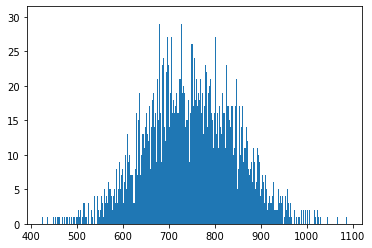

In [3]:
# check normal distribution

axis = np.arange(start=min(s), stop = max(s) + 1)
plt.hist(s, bins = axis)
plt.show()


In [4]:
#generate random names
import names
name = []
for i in range(3000):
    name.append(names.get_full_name())
    
name[:10]

['Rudolph Howell',
 'Garry Jackson',
 'John Hobbs',
 'Isiah Dececco',
 'Fannie London',
 'Michael Koh',
 'Ben Page',
 'Ann Belliveau',
 'John Zehner',
 'Tamara Grimes']

In [5]:
#normally distributed age between 18-99
age_norm = get_truncated_normal(mean=(18+99)/2, sd=10, low=18, upp=99)

#create owner table
dim_owner_df = pd.DataFrame() 
dim_owner_df["Owner_ID"] = list(range(1, 3001))                                                                                                                               
dim_owner_df["Name"] = name
dim_owner_df["Age"] = np.rint(age_norm.rvs(3000))
dim_owner_df["Gender"] = np.random.choice(['F','M'], size=3000)  
dim_owner_df


,Owner_ID,Name,Age,Gender
0,1,Rudolph Howell,47.0,M
1,2,Garry Jackson,79.0,F
2,3,John Hobbs,68.0,F
3,4,Isiah Dececco,62.0,M
4,5,Fannie London,71.0,M
...,...,...,...,...
2995,2996,Alan Bergin,55.0,F
2996,2997,Edna Cardimino,55.0,F
2997,2998,Thomas Cleveland,50.0,F
2998,2999,Clara Murphy,66.0,M


In [6]:
#generate random addresses
import json

f = open("rrad/addresses-us-all.min.json",) 
data = json.loads(f.read())


In [7]:
address = []
city = []
state = []
zipcode = []
for i in range(3000):
    
    a=random.choice(data["addresses"])
    address.append(a["address1"])
    
    if "city" in a.keys():
        city.append(a["city"])
    else:
        city.append("None")
        
    state.append(a["state"])
    zipcode.append(a["postalCode"])

city[:10]

['Montgomery',
 'Nashville',
 'Louisville',
 'Anchorage',
 'Oklahoma City',
 'Oakhurst',
 'Manchester',
 'Manchester',
 'Anchorage',
 'Montgomery']

In [8]:
len(city)

3000

In [9]:
#create location table
dim_location_df = pd.DataFrame()                                                                                                                                                                     
dim_location_df["Location_ID"] = list(range(1, 3001))                                                                                                                               
dim_location_df["Address"] = address
dim_location_df["City"] = city
dim_location_df["State"] = state
dim_location_df["Zip"] = zipcode
dim_location_df

,Location_ID,Address,City,State,Zip
0,1,4560 Hurlston Drive,Montgomery,AL,36116
1,2,5029 Montclair Drive,Nashville,TN,37211
2,3,1112 Flat Rock Road,Louisville,KY,40245
3,4,6755 Mulberry Drive,Anchorage,AK,99502
4,5,4200 Northwest 59th Street,Oklahoma City,OK,73112
...,...,...,...,...,...
2995,2996,2034 Fairfax Road,Annapolis,MD,21401
2996,2997,6902 West Sherri Jean Lane,Peoria,AZ,85382
2997,2998,2017 North Hartford Drive,Fayetteville,AR,72701
2998,2999,756 Neponset Street,Norwood,MA,02062


In [10]:
#create time table
dim_time_df = pd.DataFrame() 
dim_time_df["Time_ID"] = list(range(1, 3001))                                                                                                                              
dim_time_df["Day"] = random.randint(1,31,size=3000)
dim_time_df["Month"] = random.randint(1,12,size=3000)
dim_time_df["Year"] = np.random.choice(['2019','2020'], size=3000)
dim_time_df

,Time_ID,Day,Month,Year
0,1,11,9,2020
1,2,12,11,2019
2,3,11,8,2019
3,4,24,4,2020
4,5,2,11,2019
...,...,...,...,...
2995,2996,14,2,2019
2996,2997,25,2,2019
2997,2998,12,3,2019
2998,2999,4,11,2019


In [11]:
#create fact policy table
fact_policy_df = pd.DataFrame()                                                                                                                                                                     
fact_policy_df["Policy_ID"] = list(range(1, 5001))
fact_policy_df["Owner_ID"] = np.random.choice(dim_owner_df["Owner_ID"], size=5000) 
fact_policy_df["Location_ID"] = np.random.choice(dim_location_df["Location_ID"], size=5000) 
fact_policy_df["Time_ID"] = np.random.choice(dim_time_df["Time_ID"], size=5000) 
fact_policy_df["Premiun"] = randomInts                                                                                                                                              
fact_policy_df.head(5)

,Policy_ID,Owner_ID,Location_ID,Time_ID,Premiun
0,1,794,1457,2896,999.0
1,2,353,2461,794,752.0
2,3,856,2471,910,713.0
3,4,957,1878,1400,761.0
4,5,2908,2456,2488,657.0


In [15]:
merge_owner = pd.merge(fact_policy_df, dim_owner_df, how="inner", on=["Owner_ID"])

merge_owner.head(10)

,Policy_ID,Owner_ID,Location_ID,Time_ID,Premiun,Name,Age,Gender
0,1,794,1457,2896,999.0,Roland Weldon,62.0,M
1,2,353,2461,794,752.0,Lillian Sherman,63.0,F
2,2035,353,914,1303,428.0,Lillian Sherman,63.0,F
3,3,856,2471,910,713.0,Mauricio Johnson,69.0,M
4,1308,856,1830,1302,820.0,Mauricio Johnson,69.0,M
5,4,957,1878,1400,761.0,Preston Truman,41.0,M
6,3301,957,2341,2387,711.0,Preston Truman,41.0,M
7,5,2908,2456,2488,657.0,Roger Stanley,44.0,M
8,2216,2908,2712,2024,663.0,Roger Stanley,44.0,M
9,3135,2908,1973,1995,825.0,Roger Stanley,44.0,M


In [18]:
merge_location = pd.merge(fact_policy_df, dim_location_df, how="inner" , on=["Location_ID"])
merge_location.head(10)

,Policy_ID,Owner_ID,Location_ID,Time_ID,Premiun,Address,City,State,Zip
0,1,794,1457,2896,999.0,804 Old Coach Place,Nashville,TN,37076
1,4560,1910,1457,1452,757.0,804 Old Coach Place,Nashville,TN,37076
2,2,353,2461,794,752.0,1247 West Mount Comfort Road,Fayetteville,AR,72703
3,1455,2664,2461,2927,568.0,1247 West Mount Comfort Road,Fayetteville,AR,72703
4,4994,2415,2461,6,762.0,1247 West Mount Comfort Road,Fayetteville,AR,72703
5,3,856,2471,910,713.0,5110 East Shoshone Avenue,Orange,CA,92867
6,2134,2007,2471,1533,782.0,5110 East Shoshone Avenue,Orange,CA,92867
7,3410,1406,2471,2804,698.0,5110 East Shoshone Avenue,Orange,CA,92867
8,4,957,1878,1400,761.0,133 White Cap Way,Panama City Beach,FL,32407
9,91,1401,1878,477,861.0,133 White Cap Way,Panama City Beach,FL,32407


In [19]:
merge_time = pd.merge(fact_policy_df, dim_time_df, how="inner" , on=["Time_ID"])
merge_time.head(10)

,Policy_ID,Owner_ID,Location_ID,Time_ID,Premiun,Day,Month,Year
0,1,794,1457,2896,999.0,15,2,2019
1,158,848,1751,2896,717.0,15,2,2019
2,918,2484,1024,2896,560.0,15,2,2019
3,1597,1100,1489,2896,701.0,15,2,2019
4,1760,798,2719,2896,831.0,15,2,2019
5,2,353,2461,794,752.0,17,5,2019
6,2031,1244,1089,794,793.0,17,5,2019
7,2544,2408,808,794,819.0,17,5,2019
8,3785,2102,1946,794,804.0,17,5,2019
9,3,856,2471,910,713.0,22,10,2019
